# CONSEGNA ESAME FINALE
Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " Download ourcomplete COVID-19 dataset"scaricare il dataset nel formato che si preferisce.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Caricare il dataset
Covid_19 = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv')

# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati.

In [31]:
print(f'Dimensioni del dataset: {Covid_19.shape}')
Covid_19.info()

Dimensioni del dataset: (429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed              

# 2. Si chiede di trovare, per ogni continente il numero di casi fin dall'inizio della pandemia e la percentuale rispetto al totale mondiale del numero di casi.

In [60]:
# Raggruppo i dati per continente e sommo i nuovi casi
casi_continenti = Covid_19.groupby('continent')['new_cases'].sum()

# Calcolo il totale mondiale dei casi
tot_casi_mondiali = casi_continenti.sum()

# Visualizzo il totale dei casi mondiali
print(f'I casi, in tutto il mondo, di Covid-19 sono: {tot_casi_mondiali}')

# Calcolo la percentuale per ogni continente rispetto al totale mondiale
casi_continenti_percentuale = (casi_continenti / tot_casi_mondiali) * 100

# Aggiungo la colonna della percentuale al dataframe
casi_continenti = pd.DataFrame({
    'total_cases': casi_continenti,
    '% Mondiale': round(casi_continenti_percentuale, 2)
})

casi_continenti

I casi, in tutto il mondo, di Covid-19 sono: 775935057.0


,total_cases,% Mondiale
continent,,
Africa,13146831.0,1.69
Asia,301564180.0,38.86
Europe,252916868.0,32.60
North America,124492698.0,16.04
Oceania,15003468.0,1.93
South America,68811012.0,8.87


# 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati l'evoluzione del casi totali dall'inizio alla fine dell'anno e il numero di nuovi casi rispetto alla data.
# Poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.

In [58]:
# Filtro i dati per l'Italia nel 2022
maschera_italia_2022 = Covid_19[(Covid_19['location'] == 'Italy') & (Covid_19['date'].dt.year == 2022)]

# Seleziono solo le colonne rilevanti
maschera_italia_2022 = maschera_italia_2022[['location', 'date', 'total_cases', 'new_cases']]

# Converto le colonne 'total_cases' e 'new_cases' in interi, gestendo eventuali NaN
maschera_italia_2022[['total_cases', 'new_cases']] = maschera_italia_2022[['total_cases', 'new_cases']].fillna(0).astype('int')

maschera_italia_2022

,location,date,total_cases,new_cases
186002,Italy,2022-01-01,5622431,0
186003,Italy,2022-01-02,6267035,644604
186004,Italy,2022-01-03,6267035,0
186005,Italy,2022-01-04,6267035,0
186006,Italy,2022-01-05,6267035,0
...,...,...,...,...
186362,Italy,2022-12-27,25060503,0
186363,Italy,2022-12-28,25060503,0
186364,Italy,2022-12-29,25060503,0
186365,Italy,2022-12-30,25060503,0


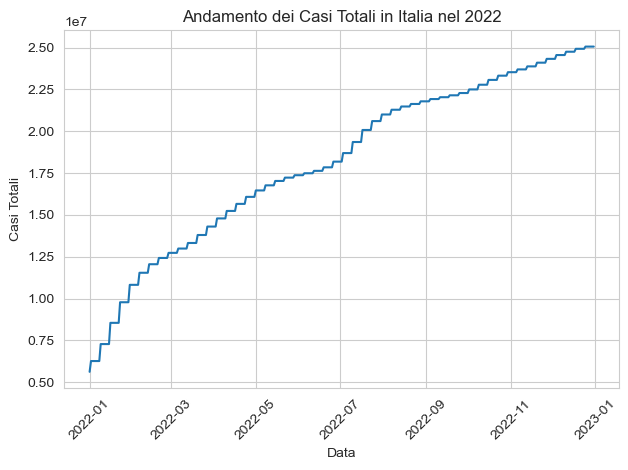

In [64]:
# Creo il grafico del trend dei casi totali in Italia nel 2022
andamento_italia_2022 = sns.lineplot(data=maschera_italia_2022, x='date', y='total_cases')

# Aggiungo il titolo
andamento_italia_2022.set_title('Andamento dei Casi Totali in Italia nel 2022')

# Aggiungo le etichette degli assi
andamento_italia_2022.set_xlabel('Data')
andamento_italia_2022.set_ylabel('Casi Totali')

# Rotazione delle etichette sull'asse X per migliorarne la leggibilità
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

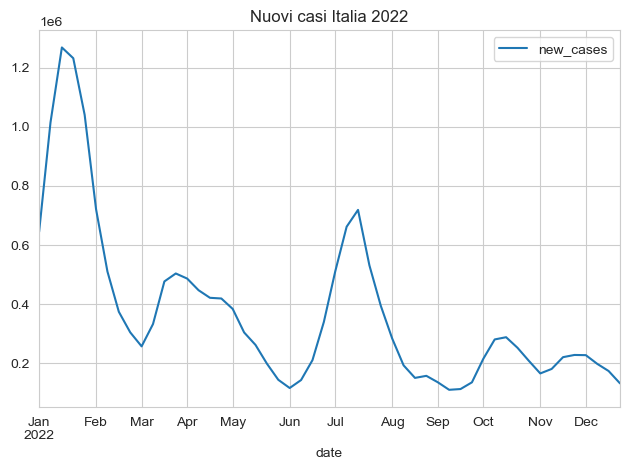

In [65]:
# Filtro i dati per rimuovere i valori zero nei nuovi casi e crea il grafico
maschera_italia_2022[maschera_italia_2022['new_cases'] > 0].plot(
    kind='line', x='date', y='new_cases', title='Nuovi casi Italia 2022', grid=True)

# Visualizzazione del grafico
plt.tight_layout()
plt.show()

# Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso).
# Scrivere un breve commento a riguardo.

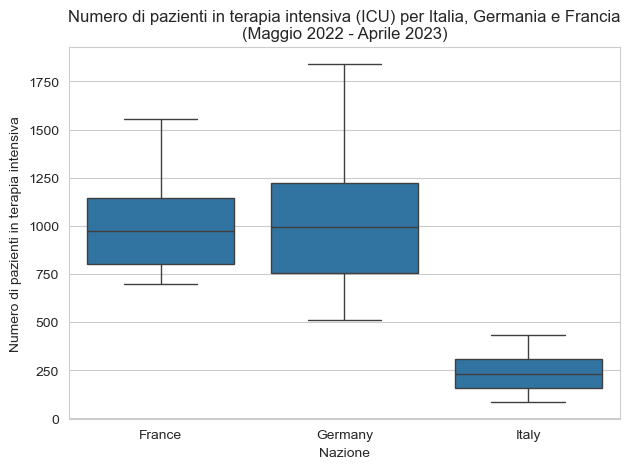

In [66]:
# Filtro i dati per le nazioni richieste e per il periodo maggio 2022 - aprile 2023
nazioni_interessate = ['Italy', 'Germany', 'France']
filtro_nazioni = Covid_19['location'].isin(nazioni_interessate)
filtro_date = (Covid_19['date'] >= '2022-05-01') & (Covid_19['date'] <= '2023-04-30')

# Creo il dataframe filtrato
dati_filtrati = Covid_19[filtro_nazioni & filtro_date]

# Creo un boxplot per il numero di pazienti in terapia intensiva per ciascuna nazione
sns.boxplot(data=dati_filtrati, x='location', y='icu_patients')

# Aggiungo titolo e etichette
plt.title('Numero di pazienti in terapia intensiva (ICU) per Italia, Germania e Francia\n(Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')

# Mostro il grafico
plt.tight_layout()
plt.show()

# Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
# a. mostrare la somma dei pazienti ospitalizzati per ognuna;
# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [54]:
# Filtro i dati per le nazioni richieste e per l'anno 2023
nazioni_interessate = ['Italy', 'Germany', 'France', 'Spain']
dati_2023 = Covid_19[(Covid_19['location'].isin(nazioni_interessate)) & (Covid_19['date'].dt.year == 2023)]

# Sommo i pazienti ospitalizzati per ogni nazione
somma_pazienti = dati_2023.groupby('location')['hosp_patients'].sum().reset_index()

# Stampa la somma dei pazienti ospitalizzati come tabella
print(somma_pazienti.to_string(index=False))

# Verifica la presenza di dati nulli
dati_nulli = dati_2023['hosp_patients'].isnull().sum()

# Commento sui dati nulli
if dati_nulli > 0:
    print(f"\nCi sono {dati_nulli} valori nulli nella colonna 'hosp_patients'. Possibile sostituirli con media o mediana.")
else:
    print("\nNon ci sono dati nulli nella colonna 'hosp_patients'.")

location  hosp_patients
  France      1382574.0
 Germany            0.0
   Italy      1175272.0
   Spain       354602.0

Ci sono 843 valori nulli nella colonna 'hosp_patients'. Possibile sostituirli con media o mediana.
